In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [2]:
with open('Q_hard.pickle', 'rb') as fp:
    Q = pickle.load(fp)

with open('inven_hard.pickle', 'rb') as fp:
    inven = pickle.load(fp)

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
# part of Q and inven
pQ = Q
pI = inven

In [5]:
l = pI.shape[1]

In [6]:
pI.shape

(10, 201, 2)

In [7]:
df = []
for ins in range(10):
    for act in range(4):
        val = pQ[ins, :, :, act].mean(1)
        df.append(pd.DataFrame({'Q':val, 'instance': ins*np.ones(l), 
                                'Actions':[str(act+1),]*l, 'step': np.arange(l)}))
Qdf = pd.concat(df)

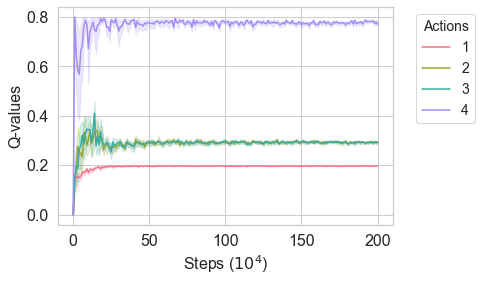

In [8]:
# figsize=(8,6)
plt.figure()
palette = sns.color_palette("husl", 4)
g = sns.lineplot(data=Qdf, x='step', y='Q', hue='Actions', palette=palette)
plt.xlabel(r'Steps ($10^4$)', fontsize=16)
plt.ylabel('Q-values', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), title='Actions', fontsize=14, title_fontsize=14)
plt.savefig('QHard.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [9]:
df_temp = []
for ins in range(10):
    for agent in range(2):
        val = pI[ins, :, agent]
        df_temp.append(pd.DataFrame({'Inventory':val, 'instance': ins*np.ones(l), 
                                     'Agent':[str(agent+1),]*l, 'step': np.arange(l)}))
Idf = pd.concat(df_temp)

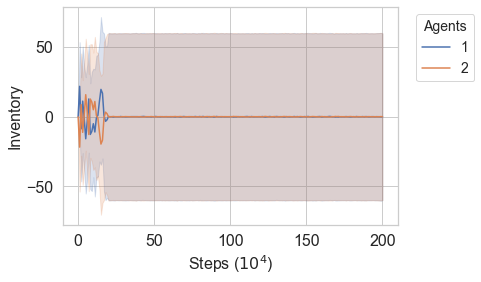

In [10]:
# figsize=(8,6)
plt.figure()
palette = sns.color_palette("husl", 4)
g = sns.lineplot(data=Idf, x='step', y='Inventory', hue='Agent')
plt.xlabel(r'Steps ($10^4$)', fontsize=16)
plt.ylabel('Inventory', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1.25, 1), title='Agents', fontsize=14, title_fontsize=14)
plt.savefig('InvHard.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)